<a name="TOP" />
- [The Mongo Shell](#SHELL)
- [PyMongo](#PYMONGO)

<a name="SHELL" />
## Accessing the mongo shell
[TOP](#TOP)

This section shows usage of the MongoDB shell, but due to the non-interactive nature of the Jupyter Notebook cells, we show each interaction as a command-line invocation of the "mongo" shell client with the command to execute as an argument.

We start by defining an IPython alias to facilitate running mongo commands.

In [1]:
%alias mongo c:/Progs/MongoDB/bin/mongo.exe --eval %s localhost:27017/%s

NOTE: To use mongo alias, must be in quotes and only one statement (last one) is executed

NOTE: We must always give the name of a database (even one that doesn't exist) to be able to run a query

In [2]:
mongo "db.version()" ANY

MongoDB shell version: 3.2.3
connecting to: localhost:27017/ANY
3.2.3


Let's get a list of collections contained within the 'Money_UK' database:

In [3]:
mongo "db.getCollectionNames()" Money_UK

MongoDB shell version: 3.2.3
connecting to: localhost:27017/Money_UK
[ "CARD", "SAVING" ]


In [4]:
mongo "db.stats()" Money_UK

MongoDB shell version: 3.2.3
connecting to: localhost:27017/Money_UK
{
	"db" : "Money_UK",
	"collections" : 2,
	"objects" : 2974,
	"avgObjSize" : 161.98520511096166,
	"dataSize" : 481744,
	"storageSize" : 192512,
	"numExtents" : 0,
	"indexes" : 2,
	"indexSize" : 53248,
	"ok" : 1
}


Let's see what commands are available in the MongoDB shell

In [5]:
mongo "db.help()" Money_UK

MongoDB shell version: 3.2.3
connecting to: localhost:27017/Money_UK
DB methods:
	db.adminCommand(nameOrDocument) - switches to 'admin' db, and runs command [ just calls db.runCommand(...) ]
	db.auth(username, password)
	db.cloneDatabase(fromhost)
	db.commandHelp(name) returns the help for the command
	db.copyDatabase(fromdb, todb, fromhost)
	db.createCollection(name, { size : ..., capped : ..., max : ... } )
	db.createUser(userDocument)
	db.currentOp() displays currently executing operations in the db
	db.dropDatabase()
	db.eval() - deprecated
	db.fsyncLock() flush data to disk and lock server for backups
	db.fsyncUnlock() unlocks server following a db.fsyncLock()
	db.getCollection(cname) same as db['cname'] or db.cname
	db.getCollectionInfos([filter]) - returns a list that contains the names and options of the db's collections
	db.getCollectionNames()
	db.getLastError() - just returns the err msg string
	db.getLastErrorObj() - return full status object
	db.getLogComponents()
	db.getM

Let's see how many documents exist in the CARD collection:

In [6]:
mongo "cc=db.CARD;print(cc.find().count())" Money_UK

MongoDB shell version: 3.2.3
connecting to: localhost:27017/Money_UK
1493


Let's see how many documents exist in the SAVING collection:

In [7]:
mongo "saving=db.SAVING;print(saving.find().count())" Money_UK

MongoDB shell version: 3.2.3
connecting to: localhost:27017/Money_UK
1481


Let's show the 'first' document in the CARD collection:

In [8]:
mongo "cc=db.CARD;cc.findOne()" Money_UK

MongoDB shell version: 3.2.3
connecting to: localhost:27017/Money_UK
{
	"_id" : ObjectId("56cb51c37469f7afbc7f375b"),
	"date" : ISODate("1988-10-21T00:00:00Z"),
	"value" : 18.53,
	"info" : "Interest",
	"account" : "./UK_GBP_Access-CC",
	"tags" : [
		"interest",
		"interest"
	],
	"comment" : ""
}


Let's search for any CARD documents with that same timestamp:

In [9]:
mongo "cc=db.CARD;cc.find({'date':ISODate('1988-09-27T00:00:00Z')})" Money_UK

MongoDB shell version: 3.2.3
connecting to: localhost:27017/Money_UK
{ "_id" : ObjectId("56cb51c37469f7afbc7f375c"), "date" : ISODate("1988-09-27T00:00:00Z"), "value" : 20.4, "info" : "Filton Tech. Coll.", "account" : "./UK_GBP_Access-CC", "tags" : [ "misc", "unknown" ], "comment" : "" }
{ "_id" : ObjectId("56cb51c37469f7afbc7f375e"), "date" : ISODate("1988-09-27T00:00:00Z"), "value" : 29.97, "info" : "Burtons, Glasgow", "account" : "./UK_GBP_Access-CC", "tags" : [ "bills", "clothes" ], "comment" : "" }


Let's perform the same search but provide a projection to show only the value field

NOTE: it will show the '_id' index field unless we explicitly disable it.


In [10]:
mongo "cc=db.CARD;cc.find({'date':ISODate('1988-09-27T00:00:00Z')},{value:1})" Money_UK

MongoDB shell version: 3.2.3
connecting to: localhost:27017/Money_UK
{ "_id" : ObjectId("56cb51c37469f7afbc7f375c"), "value" : 20.4 }
{ "_id" : ObjectId("56cb51c37469f7afbc7f375e"), "value" : 29.97 }


Now let's perform the same search but provide a projection to show only the value field, without the '_id' index field

In [11]:
mongo "cc=db.CARD;cc.find({'date':ISODate('1988-09-27T00:00:00Z')},{_id:0,value:1})" Money_UK

MongoDB shell version: 3.2.3
connecting to: localhost:27017/Money_UK
{ "value" : 20.4 }
{ "value" : 29.97 }


We can also perform the same search and sort the result in ASCENDING(1) or DESCENDING(-1) order:

In [12]:
mongo "cc=db.CARD;cc.find({'date':ISODate('1988-09-27T00:00:00Z')},{_id:0,value:1}).sort({value:1})" Money_UK

MongoDB shell version: 3.2.3
connecting to: localhost:27017/Money_UK
{ "value" : 20.4 }
{ "value" : 29.97 }


In [13]:
mongo "cc=db.CARD;cc.find({'date':ISODate('1988-09-27T00:00:00Z')},{_id:0,value:1}).sort({value:-1})" Money_UK

MongoDB shell version: 3.2.3
connecting to: localhost:27017/Money_UK
{ "value" : 29.97 }
{ "value" : 20.4 }


In the following example we show many entries, but the output is automatically limited to 20 documents:

In [14]:
mongo "cc=db.CARD;cc.find({},{_id:0,value:1}).sort({value:1})" Money_UK

MongoDB shell version: 3.2.3
connecting to: localhost:27017/Money_UK
{ "value" : -1695.61 }
{ "value" : -1200 }
{ "value" : -1000 }
{ "value" : -834.51 }
{ "value" : -715.46 }
{ "value" : -703.16 }
{ "value" : -670 }
{ "value" : -652.37 }
{ "value" : -600 }
{ "value" : -590 }
{ "value" : -535 }
{ "value" : -500 }
{ "value" : -490.21 }
{ "value" : -316.81 }
{ "value" : -238.42 }
{ "value" : -210 }
{ "value" : -200 }
{ "value" : -184.25 }
{ "value" : -150 }
{ "value" : -150 }
Type "it" for more


Here, we limit the output to only 5 documents:

In [15]:
mongo "cc=db.CARD;cc.find({},{_id:0,value:1}).sort({value:1}).limit(5)" Money_UK

MongoDB shell version: 3.2.3
connecting to: localhost:27017/Money_UK
{ "value" : -1695.61 }
{ "value" : -1200 }
{ "value" : -1000 }
{ "value" : -834.51 }
{ "value" : -715.46 }


We can also specify to skip the first 5 documents (it will show the following 20 documents):

In [16]:
mongo "cc=db.CARD;cc.find({},{_id:0,value:1}).sort({value:1}).skip(5)" Money_UK

MongoDB shell version: 3.2.3
connecting to: localhost:27017/Money_UK
{ "value" : -703.16 }
{ "value" : -670 }
{ "value" : -652.37 }
{ "value" : -600 }
{ "value" : -590 }
{ "value" : -535 }
{ "value" : -500 }
{ "value" : -490.21 }
{ "value" : -316.81 }
{ "value" : -238.42 }
{ "value" : -210 }
{ "value" : -200 }
{ "value" : -184.25 }
{ "value" : -150 }
{ "value" : -150 }
{ "value" : -124.94 }
{ "value" : -108.18 }
{ "value" : -107.84 }
{ "value" : -104.46 }
{ "value" : -104 }
Type "it" for more


#### SQL Equivalent

The equivalent query in SQL, for the query below, would be:

```sql
SELECT value            # Projection
FROM cc                 # Table (Collection)
WHERE value > -100.00   # select criteria
LIMIT 5                 # cursor modifier
```

Below we show the 1st five values with value less than -100.00

In [17]:
mongo "cc=db.CARD;cc.find({value:{$gt:-100.00}},{_id:0,value:1}).sort({value:1}).limit(5)" Money_UK

MongoDB shell version: 3.2.3
connecting to: localhost:27017/Money_UK
{ "value" : -85.58 }
{ "value" : -79.8 }
{ "value" : -76.15 }
{ "value" : -63.16 }
{ "value" : -50.1 }


or the info and value fields associated with all 'media_music' tags:

In [18]:
mongo "cc=db.CARD;cc.find({'tags':['media','music']},{_id:0,info:1,value:1})" Money_UK

MongoDB shell version: 3.2.3
connecting to: localhost:27017/Money_UK
{ "value" : 27.41, "info" : "Sing Chong PTE Ltd." }
{ "value" : 23.25, "info" : "CD Cases Maplin" }
{ "value" : 18, "info" : "Sunrise Records, Toronto" }
{ "value" : 21.29, "info" : "Musique D\"Auteuil, Quebec" }
{ "value" : 29.5, "info" : "Tower Records, NY" }
{ "value" : 20.84, "info" : "The Wiz/New York" }
{ "value" : 16.87, "info" : "Records on Wheels, Ottawa" }
{ "value" : 65.92, "info" : "HMV,Manchester" }
{ "value" : 44.56, "info" : "French CDs,EuroM" }
{ "value" : 12.57, "info" : "CD,La FNAC{Paris, 121 F}" }
{ "value" : 15.37, "info" : "CD,film" }
{ "value" : 18.2, "info" : "CDs{Slade/J Winter, }" }
{ "value" : 36.67, "info" : "Carrefour CDs" }
{ "value" : 38.39, "info" : "La FNAC CDs" }
{ "value" : 33.29, "info" : "HMV CDs" }
{ "value" : 39, "info" : "Hi-Fi News/RR Subscription,Nov92-Jan94" }
{ "value" : 31.96, "info" : "HMV Oxford St." }
{ "value" : 25.68, "info" : "Carrefour CDs" }
{ "value" : 21.93, "info"

<a name="PYMONGO" />
## Using the Pymongo driver
[TOP](#TOP)

Now let's look at using the Pymongo driver to access our 'Money_UK' database.

Let's first connect to MongoDB, creating a 'client' object and then list the available databases:

In [19]:
# First install pymongo client:
#    conda install pymongo  

from pymongo import MongoClient,ASCENDING,DESCENDING

client = MongoClient("mongodb://localhost:27017")

dbnames = [dbname for dbname in client.database_names() ]
print("Available databases: <" + str(dbnames))

Available databases: <['Money_UK', 'aggregation_example', 'local', 'test']


Now let's explicitly connect to the 'Money_UK' DB and then list the collections contained within it:

In [20]:
db = client.Money_UK

dbname = db.name
print("Opened db<" + dbname + ">")
collnames = [collname for collname in db.collection_names() ]
print("Available collections in db<" + dbname + ">: " + str(collnames))

Opened db<Money_UK>
Available collections in db<Money_UK>: ['CARD', 'SAVING']


Below we perform a find() operation on the 'CARD' and 'SAVING' collections.

The find() method returns a cursor on which we can iterate.

We use the cursor to show just the first N(4) documents in each collection

In [21]:
# Query for All Documents in a Collection
# To return all documents in a collection, call the find() method without a criteria document.
# For example, the following operation queries for all documents in the restaurants collection.

CARD = db.CARD
SAVING = db.SAVING

cursor = CARD.find()
print()
print("Number of documents in CARD collection: " + str( cursor.count() ))
N=4
print("1st {} documents:".format(N))
for document in cursor.limit(N):
    print(document)

cursor = SAVING.find()
print()
print("Number of documents in SAVING collection: " + str( cursor.count() ))
N=4
print("1st {} documents:".format(N))
for document in cursor.limit(N):
    print(document)


Number of documents in CARD collection: 1493
1st 4 documents:
{'account': './UK_GBP_Access-CC', 'comment': '', '_id': ObjectId('56cb51c37469f7afbc7f375b'), 'date': datetime.datetime(1988, 10, 21, 0, 0), 'tags': ['interest', 'interest'], 'info': 'Interest', 'value': 18.53}
{'account': './UK_GBP_Access-CC', 'comment': '', '_id': ObjectId('56cb51c37469f7afbc7f375c'), 'date': datetime.datetime(1988, 9, 27, 0, 0), 'tags': ['misc', 'unknown'], 'info': 'Filton Tech. Coll.', 'value': 20.4}
{'account': './UK_GBP_Access-CC', 'comment': '', '_id': ObjectId('56cb51c37469f7afbc7f375d'), 'date': datetime.datetime(1988, 9, 1, 0, 0), 'tags': ['bills', 'house'], 'info': 'Flowers, W_O_T', 'value': 8.0}
{'account': './UK_GBP_Access-CC', 'comment': '', '_id': ObjectId('56cb51c37469f7afbc7f375e'), 'date': datetime.datetime(1988, 9, 27, 0, 0), 'tags': ['bills', 'clothes'], 'info': 'Burtons, Glasgow', 'value': 29.97}

Number of documents in SAVING collection: 1481
1st 4 documents:
{'account': './UK_GBP_Barc

We can also apply sorting the find() call, which also returns the cursor to use.

In the following example we see the effect of using ASCENDING or DESCENDING sort (in the descending case we see entries from year 2013).

In [23]:
cursor = SAVING.find().sort([ ('date', ASCENDING) ])

print()
print("Number of documents in SAVING collection: " + str( cursor.count() ))
N=4
print("1st {} documents: ORDERED by ASCENDING date".format(N))
for document in cursor.limit(N):
    print(document)
    
cursor = SAVING.find().sort([ ('date', DESCENDING) ])

print()
print("Number of documents in SAVING collection: " + str( cursor.count() ))
N=4
print("1st {} documents: ORDERED by DESCENDING date".format(N))
for document in cursor.limit(N):
    print(document)


Number of documents in SAVING collection: 1481
1st 4 documents: ORDERED by ASCENDING date
{'account': './UK_GBP_Barclays_CA', 'comment': '', '_id': ObjectId('56cb51c47469f7afbc7f3af2'), 'date': datetime.datetime(1988, 9, 1, 0, 0), 'tags': ['fun', 'hols'], 'info': 'Borth YHA', 'value': -10.0}
{'account': './UK_GBP_Barclays_CA', 'comment': '', '_id': ObjectId('56cb51c47469f7afbc7f3ae3'), 'date': datetime.datetime(1988, 9, 27, 0, 0), 'tags': ['misc', 'pay'], 'info': 'ACCESS', 'value': -1200.0}
{'account': './UK_GBP_Barclays_CA', 'comment': '', '_id': ObjectId('56cb51c47469f7afbc7f3ae7'), 'date': datetime.datetime(1988, 9, 28, 0, 0), 'tags': ['salary', 'salary'], 'info': 'Wage', 'value': 883.65}
{'account': './UK_GBP_Barclays_CA', 'comment': '', '_id': ObjectId('56cb51c47469f7afbc7f3ae5'), 'date': datetime.datetime(1988, 10, 1, 0, 0), 'tags': ['bills', 'house'], 'info': 'Rates', 'value': -58.4}

Number of documents in SAVING collection: 1481
1st 4 documents: ORDERED by DESCENDING date
{'a

Below we specify an empty match condition '{}' on the find() call, but we also provide a '{value: 1, _id: 0}' projection so that this cursor only returns the value field for each document.

In [24]:
cursor = SAVING.find(
    # SELECTION CRITERIA:
    {},    
    # PROJECTION ('columns')
    {'value': 1, '_id': 0}).\
  sort([ ('date', ASCENDING) ])

print()
print("Number of documents in SAVING collection: " + str( cursor.count() ))
N=4
print("1st {} documents: ORDERED by ASCENDING date".format(N))
for document in cursor.limit(N):
    print(document)


Number of documents in SAVING collection: 1481
1st 4 documents: ORDERED by ASCENDING date
{'value': -10.0}
{'value': -1200.0}
{'value': 883.65}
{'value': -58.4}


This example searches for documents with 'salary' 'salary' as tags, and projects 'value' and 'date' fields.

This code will show the salary progression in the data over the period - nice salary increase, +67% in 3.5 years ... the gravy train went through here !

In [25]:
cursor = SAVING.find(
    {'tags': ['salary','salary']},
    {'value': 1, 'date': 1, '_id': 0}
).\
  sort([ ('date', ASCENDING) ])
    
#print(cursor)
print(cursor.count())

print()
print("Number of documents in SAVING collection: " + str( cursor.count() ))
N=100
print("1st {} documents: ORDERED by ASCENDING date".format(N))
#wages={}
wages=[]
dates=[]
for document in cursor.limit(N):
    print(document)
    # wages[ document['date'] ] = document['value']
    wages.append( document['value'] )
    dates.append( document['date'] )
    #print(document['value'])

44

Number of documents in SAVING collection: 44
1st 100 documents: ORDERED by ASCENDING date
{'date': datetime.datetime(1988, 9, 28, 0, 0), 'value': 883.65}
{'date': datetime.datetime(1988, 10, 28, 0, 0), 'value': 920.4}
{'date': datetime.datetime(1988, 11, 28, 0, 0), 'value': 998.15}
{'date': datetime.datetime(1988, 12, 30, 0, 0), 'value': 1323.36}
{'date': datetime.datetime(1989, 1, 28, 0, 0), 'value': 998.4}
{'date': datetime.datetime(1989, 2, 28, 0, 0), 'value': 998.15}
{'date': datetime.datetime(1989, 3, 31, 0, 0), 'value': 985.9}
{'date': datetime.datetime(1989, 4, 30, 0, 0), 'value': 965.63}
{'date': datetime.datetime(1989, 5, 31, 0, 0), 'value': 1340.54}
{'date': datetime.datetime(1989, 6, 30, 0, 0), 'value': 979.67}
{'date': datetime.datetime(1989, 7, 31, 0, 0), 'value': 1001.33}
{'date': datetime.datetime(1989, 8, 31, 0, 0), 'value': 1093.38}
{'date': datetime.datetime(1989, 9, 30, 0, 0), 'value': 1053.38}
{'date': datetime.datetime(1989, 10, 31, 0, 0), 'value': 1093.13}
{'d

Now let's plot that progression

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


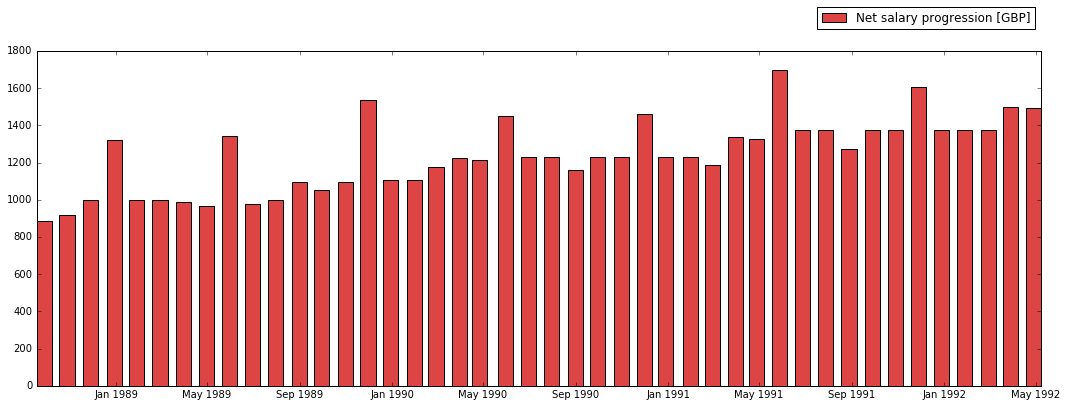

In [26]:
%pylab
%matplotlib inline

# Note: above needs matplotlib
#       conda install matplotlib

ax = plt.subplot(111)
#plt.plot(dates, wages, 'r^', label='salary progression', linestyle='solid') #drawstyle='steps') #width='200.0')
ax.bar(dates, wages, width=20, label='Net salary progression [GBP]', align='center', color="#dd4444") #, bbox_to_anchor=True)
ax.legend(bbox_to_anchor=(1.0, 1.15)).draggable()

## Modify axis:
mybox = ax.get_position()
ax.set_position([mybox.x0, mybox.y0, mybox.width * 3.0, mybox.height*1.5])

#legend()
#?plot
#?bar

## Aggregation

Now let's look at an aggregation example where we want to count the animals by type in the 'tags' field of the data.

We first 'map' the data (using '\$unwind' operation) onto a simpler structure (with only 1 tag per document),

then we count  ('reduce') the tags with the '\$group/\$sum' operations.

In [29]:
>>> from pymongo import MongoClient
>>> db = MongoClient().aggregation_example
>>> result = db.things.insert_many([{"x": 1, "tags": ["dog", "cat"]},
...                                 {"x": 2, "tags": ["cat"]},
...                                 {"x": 2, "tags": ["mouse", "cat", "dog"]},
...                                 {"x": 3, "tags": []}])
>>> result.inserted_ids

>>> from bson.son import SON
>>> pipeline = [
...     {"$unwind": "$tags"},
...     {"$group": {"_id": "$tags", "count": {"$sum": 1}}},
...     {"$sort": SON([("count", -1), ("_id", -1)])}
... ]
>>> list(db.things.aggregate(pipeline))

[{'_id': 'cat', 'count': 3},
 {'_id': 'dog', 'count': 2},
 {'_id': 'mouse', 'count': 1}]

Now let's return to our 'Money_UK' database and use aggregation to see which categories of expenditure were the most important
by grouping on the tags whilst summing the total values.

We will then plot this as a pie chart

Opened db<Money_UK>
Available collections in db<Money_UK>: ['CARD', 'SAVING']
{'total': 12792.72, '_id': ['fun', 'hols']}
{'total': 11652.940000000002, '_id': ['misc', 'pay']}
{'total': 8805.89, '_id': ['computing', 'micro']}
{'total': 6818.120000000001, '_id': ['business', 'bus']}
{'total': 6311.000000000002, '_id': ['car', 'car']}
{'total': 4642.729999999999, '_id': ['media', 'music']}
{'total': 3439.37, '_id': ['bills', 'house']}
{'total': 2400.4499999999994, '_id': ['bills', 'clothes']}
{'total': 2184.15, '_id': ['present', 'present']}
{'total': 2053.85, '_id': ['business', 'business']}


([<matplotlib.patches.Wedge at 0x85f0e10>,
  <matplotlib.text.Text at 0x8824e48>])

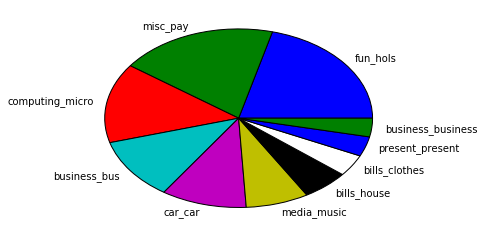

In [31]:
db = client.Money_UK

dbname = db.name
print("Opened db<" + dbname + ">")
collnames = [collname for collname in db.collection_names() ]
print("Available collections in db<" + dbname + ">: " + str(collnames))

from bson.son import SON

pipeline = [
     {"$group": {"_id": "$tags", "total": {"$sum": {"$abs": "$value"}}}},
     {"$sort": SON([("total", -1), ("_id", -1)])}
]

N=10
groups=[]
values=[]
for item in list(CARD.aggregate(pipeline))[:N]:
    print(item)
    groups.append (item['_id'][0]+"_"+item['_id'][1] )
    values.append (item['total'] )
    

pie(x=values,labels=groups)

In [32]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
// This is just to prevent scroll bars on the next section

<IPython.core.display.Javascript object>

Now let's perform aggregation by year to see how those categories evolved over time.

Note that we now project a new field 'year' a string derived from the 'date' field.

We then match on the year to only analyse data for that year and sort on the total as before.

Once we have aggregated the data for each year we then create a pie chart for that year, showing the top 6 categories

1988
{'total': 923.8, '_id': ['fun', 'hols']}
{'total': 745.08, '_id': ['business', 'business']}
{'total': 489.39000000000004, '_id': ['media', 'music']}
{'total': 411.51, '_id': ['car', 'car']}
{'total': 361.28, '_id': ['bills', 'food']}
{'total': 155.53, '_id': ['present', 'present']}


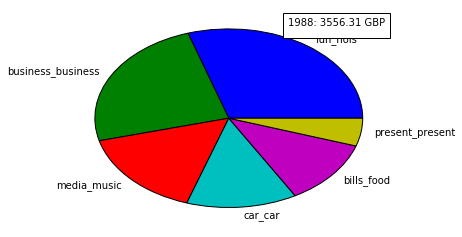

1989
{'total': 1567.31, '_id': ['fun', 'hols']}
{'total': 1127.23, '_id': ['business', 'business']}
{'total': 1055.81, '_id': ['car', 'car']}
{'total': 1053.8000000000002, '_id': ['bills', 'clothes']}
{'total': 985.4400000000002, '_id': ['media', 'music']}
{'total': 640.86, '_id': ['bills', 'house']}


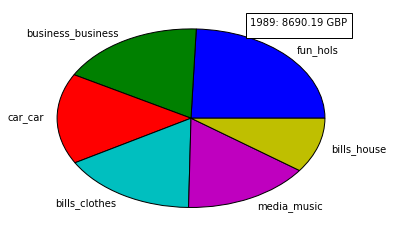

1990
{'total': 5162.360000000001, '_id': ['fun', 'hols']}
{'total': 3035.06, '_id': ['misc', 'pay']}
{'total': 1335.1599999999999, '_id': ['business', 'bus']}
{'total': 967.56, '_id': ['car', 'car']}
{'total': 819.39, '_id': ['present', 'pres']}
{'total': 446.57000000000016, '_id': ['media', 'music']}


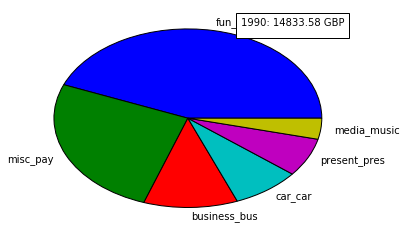

1991
{'total': 3856.2000000000003, '_id': ['misc', 'pay']}
{'total': 3681.3300000000004, '_id': ['business', 'bus']}
{'total': 1896.34, '_id': ['fun', 'hols']}
{'total': 1061.72, '_id': ['computing', 'micro']}
{'total': 1048.65, '_id': ['car', 'car']}
{'total': 848.1800000000001, '_id': ['media', 'music']}


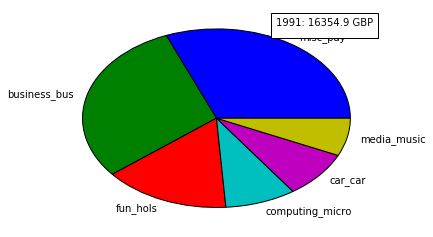

1992
{'total': 3778.0599999999995, '_id': ['misc', 'pay']}
{'total': 2424.59, '_id': ['fun', 'hols']}
{'total': 1355.2700000000002, '_id': ['car', 'car']}
{'total': 1283.54, '_id': ['media', 'video']}
{'total': 1002.5799999999999, '_id': ['bills', 'house']}
{'total': 770.95, '_id': ['media', 'music']}


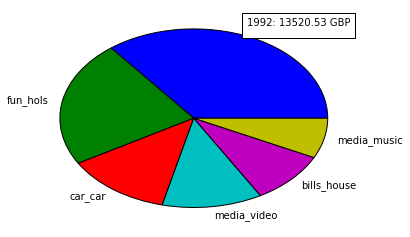

1993
{'total': 842.9, '_id': ['bills', 'house']}
{'total': 802.9300000000001, '_id': ['cashout', 'cash']}
{'total': 649.74, '_id': ['car', 'car']}
{'total': 297.0, '_id': ['misc', 'unknown']}
{'total': 95.1, '_id': ['media', 'music']}
{'total': 82.66, '_id': ['computing', 'micro']}


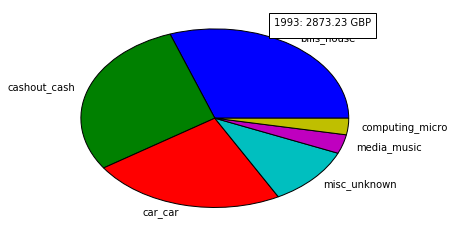

1994
{'total': 2030.0, '_id': ['computing', 'micro']}
{'total': 312.38, '_id': ['fun', 'hols']}
{'total': 96.55, '_id': ['present', 'present']}
{'total': 49.91, '_id': ['fun', 'hotel']}
{'total': 23.33, '_id': ['car', 'car']}
{'total': 10.0, '_id': ['misc', 'pay']}


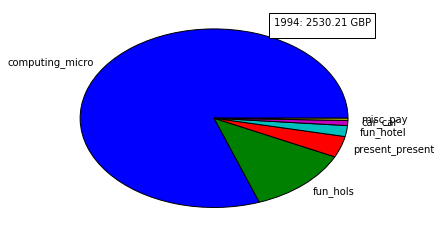

1995
{'total': 1466.5900000000001, '_id': ['computing', 'micro']}
{'total': 322.83, '_id': ['present', 'present']}
{'total': 233.29, '_id': ['media', 'photo']}
{'total': 223.98000000000002, '_id': ['media', 'music']}
{'total': 153.43, '_id': ['car', 'car']}
{'total': 119.06, '_id': ['bills', 'food']}


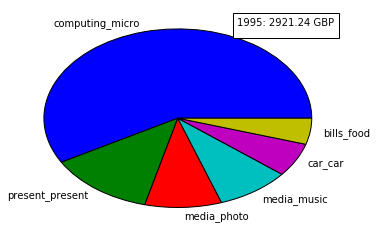

1996
{'total': 445.64000000000004, '_id': ['computing', 'micro']}
{'total': 203.5, '_id': ['misc', 'pay']}
{'total': 132.46, '_id': ['computing', 'electronics']}
{'total': 124.81, '_id': ['media', 'music']}
{'total': 87.09, '_id': ['bills', 'house']}
{'total': 66.0, '_id': ['business', 'bus']}


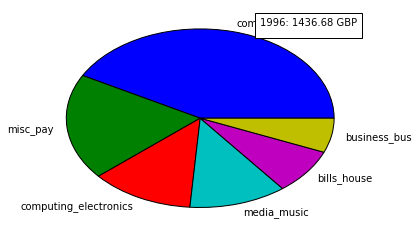

1997
{'total': 1499.81, '_id': ['computing', 'micro']}
{'total': 663.67, '_id': ['misc', 'pay']}
{'total': 411.51, '_id': ['media', 'music']}
{'total': 401.40000000000003, '_id': ['car', 'car']}
{'total': 326.95000000000005, '_id': ['business', 'bus']}
{'total': 282.69, '_id': ['bills', 'dogs']}


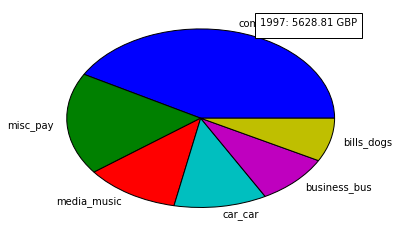

1998
{'total': 1093.6000000000001, '_id': ['computing', 'micro']}
{'total': 800.52, '_id': ['business', 'bus']}
{'total': 592.29, '_id': ['bills', 'house']}
{'total': 374.73, '_id': ['bills', 'mariage']}
{'total': 370.33, '_id': ['cashout', 'cash']}
{'total': 349.02, '_id': ['computing', 'electronics']}


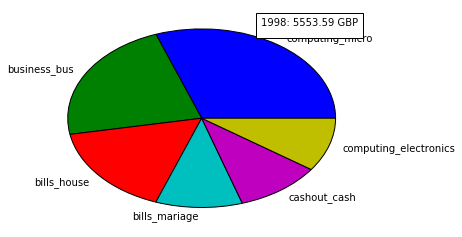

1999
{'total': 490.74, '_id': ['computing', 'micro']}
{'total': 110.58, '_id': ['media', 'magazine']}
{'total': 104.46, '_id': ['misc', 'unknown']}
{'total': 29.39, '_id': ['media', 'books']}
{'total': 4.82, '_id': ['interest', 'int_tinc']}
{'total': 1.08, '_id': ['bills', 'telephone']}


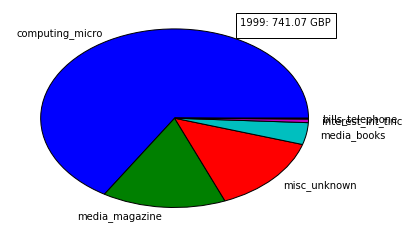

2000
{'total': 108.18, '_id': ['computing', 'micro']}
{'total': 33.81, '_id': ['misc', 'misc']}
{'total': 27.200000000000003, '_id': ['business', 'business']}
{'total': 0.37, '_id': ['interest', 'int_tinc']}


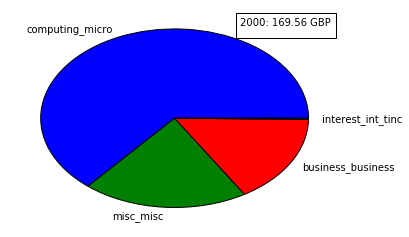

2001


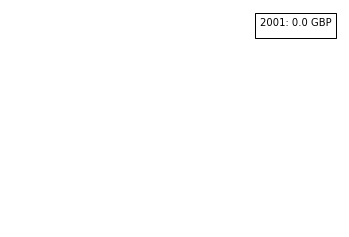

2002
{'total': 19.99, '_id': ['media', 'video']}


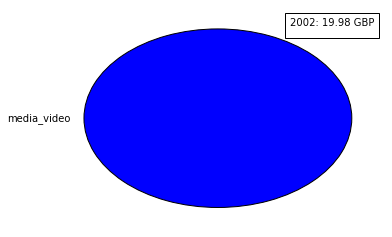

2003


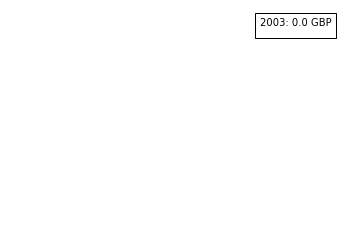

2004


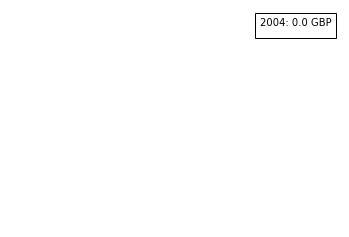

2005


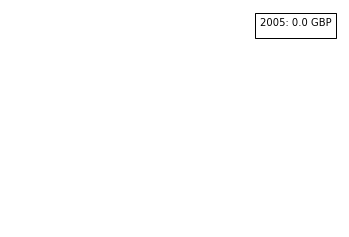

2006


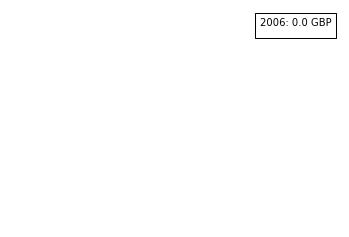

2007
{'total': 426.72, '_id': ['present', 'present']}


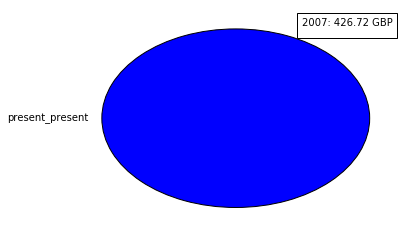

2008


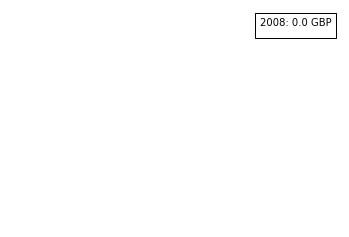

2009
{'total': 165.03, '_id': ['fun', 'hotel']}
{'total': 0.07, '_id': ['interest', 'int']}


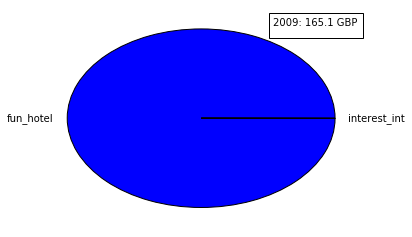

2010


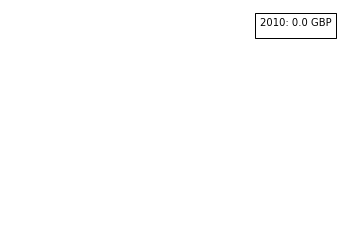

2011


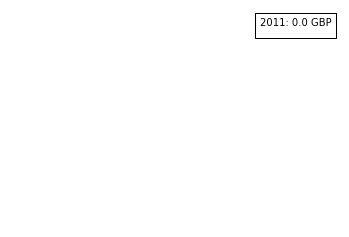

2012


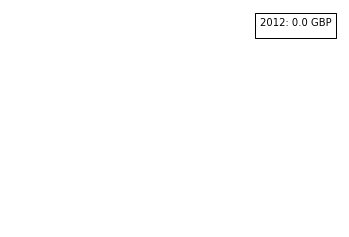

2013


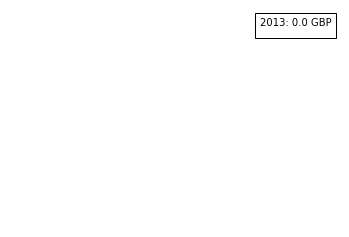

2014


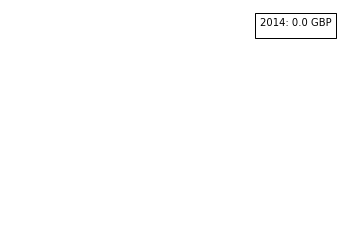

2015


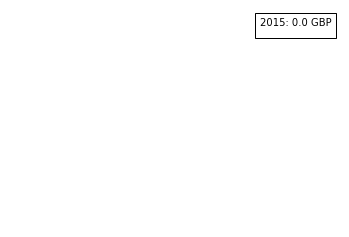

''

In [33]:
from bson.son import SON


def money(value):
    return int(100 * value)/100.0

N=6
for year in range(1988,2016):
    print(year)
    pipeline = [
        { "$project": {
            'year': { "$dateToString": { 'format': "%Y", 'date': "$date" } },
            'tags': 1,
            'value': 1,
            },
        },
        { "$match": { 'year': str(year) }},        
        { "$group": {"_id": "$tags", "total": {"$sum": {"$abs": "$value"}}} },
        { "$sort":  SON([("total", -1), ("_id", -1)]) }
    ]
    #print( list(CARD.aggregate(pipeline))[:N] )

    groups=[]
    values=[]
    total = 0.0
    for item in list(CARD.aggregate(pipeline)):
        total += item['total']
        
    for item in list(CARD.aggregate(pipeline))[:N]:
        print(item)
        groups.append (item['_id'][0]+"_"+item['_id'][1] )
        values.append (item['total'] )
    
    pie(x=values,labels=groups)
    title = str(year) + ": " + str(money(total)) + " GBP"
    
    legend(title=title,labels=[])
    show()
    
''''''